#**Prediction of T20 cricket match scores**

**Importing the required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

**Loading the dataset:**

In [ ]:
# Loading dataset
file_path = 't20_cricket_match_score_prediction.csv'
data = pd.read_csv(file_path)


In [ ]:
# Data overview
print(data.head())
print(data.info())

   Match ID  Overs Played  Wickets Lost  Run Rate Home/Away  \
0         1             7             1     11.04      Away   
1         2            20            10     11.87      Home   
2         3            15             7      6.14      Home   
3         4            11             8      8.84      Home   
4         5             8             0      9.56      Home   

   Opponent Strength Pitch Condition Weather  Predicted Score  
0                  3         Bowling   Sunny               82  
1                  5         Bowling   Sunny              204  
2                  7        Balanced   Sunny              105  
3                  9         Batting  Cloudy              121  
4                  2        Balanced   Sunny              104  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Match ID           1500 non-nu

**Categorical variables are converted to numerical format using LabelEncoder**

In [ ]:
# Preprocessing
# Encoding the categorical variables
label_encoders = {}
for col in ['Home/Away', 'Pitch Condition', 'Weather']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

**The target variable (Predicted Score) is separated from the features**

In [ ]:
# Separating features and target variable
X = data.drop(['Match ID', 'Predicted Score'], axis=1)
y = data['Predicted Score']

**Splits the dataset into training (80%) and testing (20%) sets**

In [ ]:
# Spliting into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Trains a Random Forest Regressor using the training set**

In [ ]:
# Training a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Evaluates the model using Mean Absolute Error (MAE) and Mean Squared Error (MSE)**

In [ ]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score (Accuracy): {r2:.2f}")



Mean Absolute Error (MAE): 7.8236
Mean Squared Error (MSE): 109.9455306666667
R² Score (Accuracy): 0.98


**Compares actual and predicted scores in a tabular format**

In [ ]:
# Comparing actual and predicted values
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results.tail())


     Actual  Predicted
295     145     142.90
296      49      47.61
297     136     129.10
298     156     147.36
299     273     271.37


**Scatter plot to compare actual vs. predicted scores, with a line indicating perfect predictions**

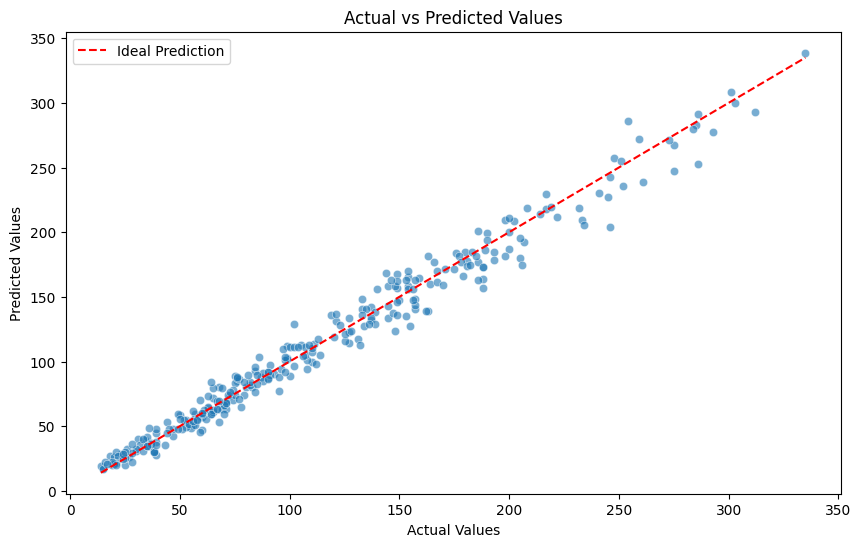

In [ ]:
# Visualizations
# Ploting actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results['Actual'], y=results['Predicted'], alpha=0.6)
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()],
         color='red', linestyle='--', label='Ideal Prediction')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

**Histogram of prediction errors to identify model bias or outliers**

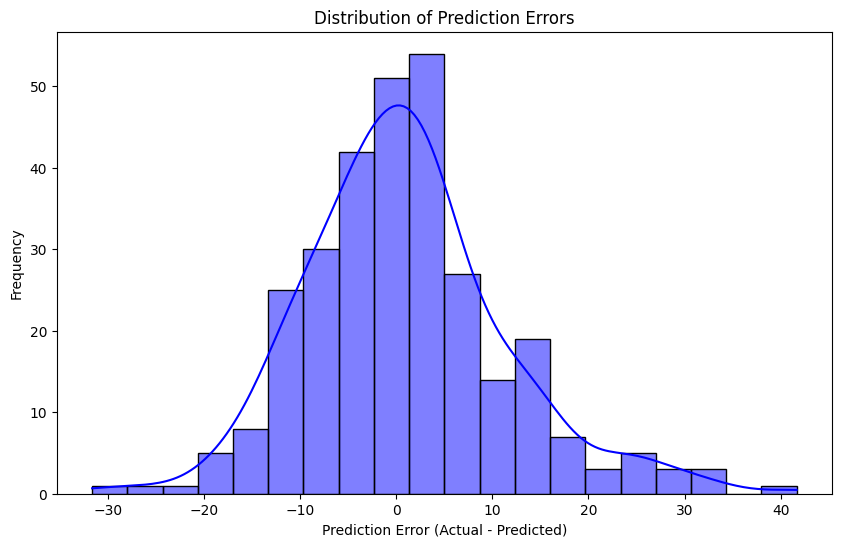

In [ ]:
#Distribution of prediction errors
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=20, kde=True, color='blue')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

**Bar plot showing which features most influence the model predictions**

<ipython-input-17-57a69a732e13>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette="viridis")


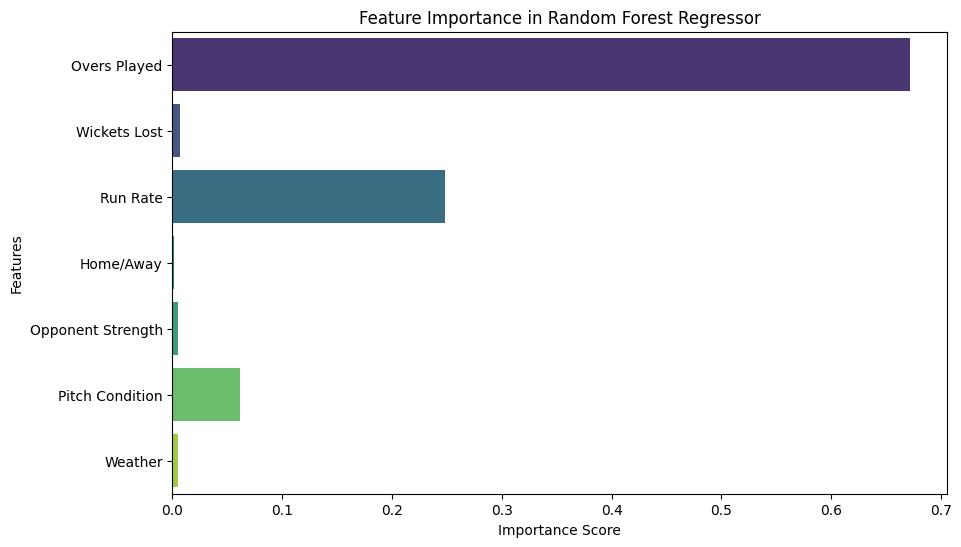

In [ ]:
# 3. Feature importance visualization
feature_importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.title("Feature Importance in Random Forest Regressor")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
